<a href="https://colab.research.google.com/github/SaraMuayad/on_boarding/blob/main/Project_Two(DataPreKit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [121]:
class DataPrepKit:
     # reading data different data file
      def read_data(self,path):
        if "csv" in path:
            return pd.read_csv(path)
        elif "xlsx" in path:
            return pd.read_excel(path)
        elif "json" in path:
            return pd.read_json(path)
        else :
            return path

     # Summerizing the data
      def summarize_data(data):
           print("Information Data :")
           print(data.info())
           print("\n Description Data :")
           print(data.describe())
           print("\n Head of Data :")
           print(data.head())

      def handle_missing(data):
           # Identify numeric and categorical columns
           category_column = data.select_dtypes(exclude=np.number).columns.tolist()
           numeric_column = data.select_dtypes(include=np.number).columns.tolist()


          # Handling missing values in numeric columns
           for col in numeric_column:
               if data[col].isnull().sum() > 0:
                   data[col].fillna(data[col].mean(), inplace=True)

         # Handling missing values in categorical columns
           for col in category_column :
               if data[col].isnull().sum() > 0:
                 data[col].fillna(data[col].mode()[0], inplace=True)

       # encoding Categorical data
      def encode_category(data):
         data_encoding = pd.get_dummies(data)
         return data_encoding

      def scatter_and_trend(data, x_column, y_column):
          plt.figure(figsize=(15,  10))
          plt.scatter(data[x_column], data[y_column])
          z = np.polyfit(data[x_column], data[y_column], 1)
          p = np.poly1d(z)
          plt.plot(data[x_column], p(data[x_column]), color='green')
          plt.grid()
          plt.xlabel(x_column)
          plt.ylabel(y_column)
          plt.title('Scatter Plot and Trend Line')
          plt.show()



In [105]:
path = input("Enter Path: ")

Enter Path: /content/sample_data/anscombe.json


In [106]:
obj = DataPrepKit()
data = obj.read_data(path)

data

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33
5,I,14,9.96
6,I,6,7.24
7,I,4,4.26
8,I,12,10.84
9,I,7,4.81


In [107]:
DataPrepKit.summarize_data(data)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Series  44 non-null     object 
 1   X       44 non-null     int64  
 2   Y       44 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB
None

Data Description:
               X          Y
count  44.000000  44.000000
mean    9.000000   7.500455
std     3.198837   1.959244
min     4.000000   3.100000
25%     7.000000   6.117500
50%     8.000000   7.520000
75%    11.000000   8.747500
max    19.000000  12.740000

Data Head:
  Series   X     Y
0      I  10  8.04
1      I   8  6.95
2      I  13  7.58
3      I   9  8.81
4      I  11  8.33


In [108]:
DataPrepKit.handle_missing(data)

In [109]:
data_endcoding = DataPrepKit.encode_category(data)

Column names in df_encoded: Index(['X', 'Y', 'Series_I', 'Series_II', 'Series_III', 'Series_IV'], dtype='object')
Enter the name of the x column: X
Enter the name of the y column: Y


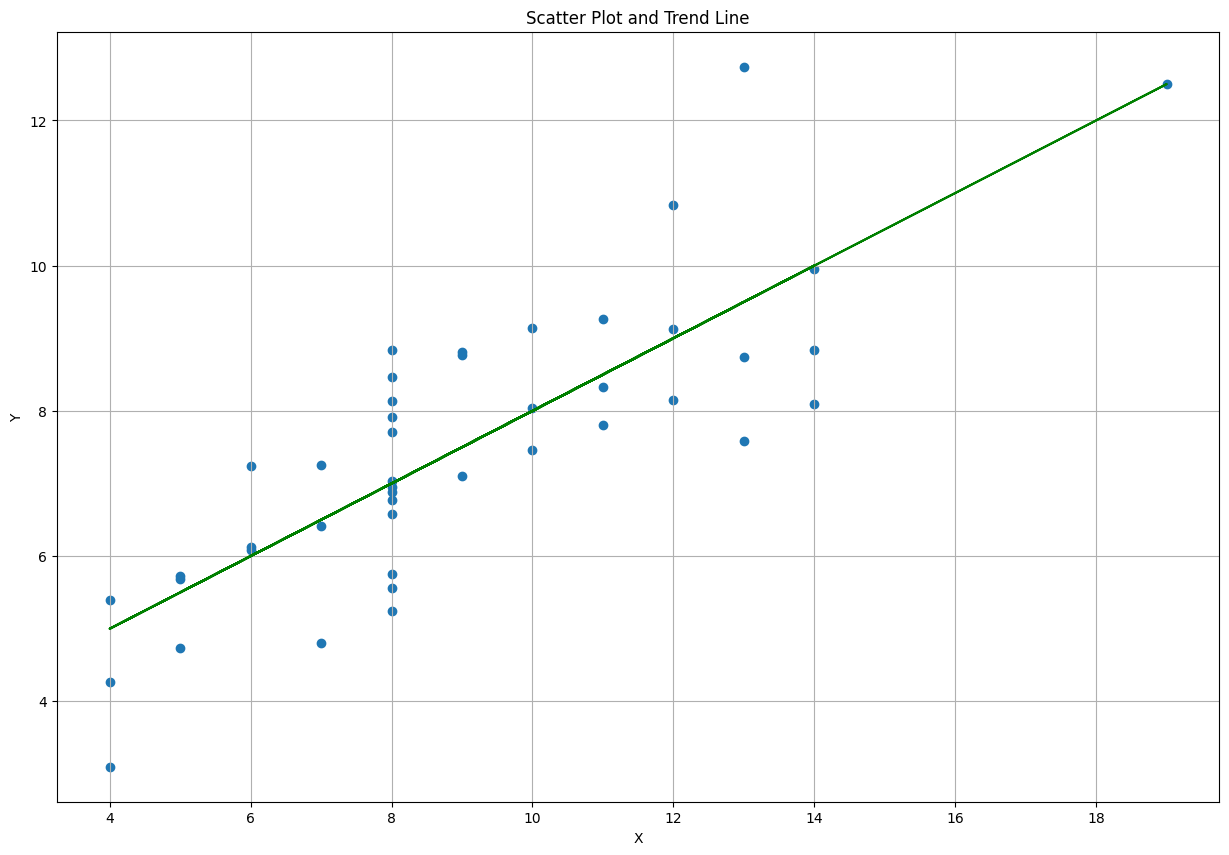

In [120]:
print("Column name in Data endcoding:", data_endcoding.columns)
  # Select x and y columns for plotting
x_column_name = input("Enter the name of the x column: ")
y_column_name = input("Enter the name of the y column: ")

# Plot scatter plot and trend line
DataPrepKit.scatter_and_trend(data_endcoding, x_column_name, y_column_name)